---
---
# UNIVERSIDADE FEDERAL FLUMINENSE
---
---
## TEP00118 - PESQUISA OPERACIONAL II
## Prof.: Diogo Ferreira de Lima Silva
---
### Monitor: Rodrigo Celso de Lima Porto
### Matrícula: 319042042
---

---
---
# PROGRAMAÇÃO NÃO LINEAR
---
---

<p align=justify> &emsp; Os problemas de Programação Não-Linear (PNL) dizem respeito aos problemas de otimização que atendem a pelo menos um dos requisitos abaixo:
<ul>
<li>A função objetivo não é uma função linear, ou seja, não é expressa como $\text{Max ou Min }z=a_{1}x_{1}+a_{2}x_{2}+\cdot \cdot \cdot \ + a_{n}x_{n}$;</li>
<li>Haja ao menos uma restrição que não seja expressa como uma equação ou inequação linear.</li>
</ul>
&emsp; E existem vários métodos para resolver um problema de PNL, sendo o mais abrangente as condições de <a href="https://pt.wikipedia.org/wiki/Condi%C3%A7%C3%B5es_de_Karush-Kuhn-Tucker" target="self">Karush-Kuhn-Tucker</a> (ou simplesmente KKT) pelo fato de este método conseguir resolver PNL tanto com restrições de igualdade quanto com os de desigualdade.
</p>

---
---
# INSTÂNCIA DE UM PROBLEMA
---
---

Exemplo retirado em: [MÉTODO DOS MULTIPLICADORES DE LAGRANGE 📚 AULA 1](https://www.youtube.com/watch?v=iPyMGocdQyU)

---

> <p align=justify>
&emsp; Uma indústria de papel está criando um novo modelo de folha com o intuito de atender o pedido de um cliente, que está requisitando um tipo não padronizado de folha para o seu novo projeto de caderno. No entanto, o cliente não informou quais seriam as dimensões desta folha de papel. Quando questionado, ele respondeu que as dimensões podem ser de quaisquer valores, desde que o perímetro da folha de papel seja igual a 200 cm, e de preferência que possua a maior área possível. Com o intuito de atender a preferência do cliente, deseja-se saber quais são as dimensões do papel que maximizem a sua área.
</p>
<p align=justify>
&emsp; O problema é um clássico exemplo de PNL, pois a função objetivo, que é a área da folha de papel, é uma função-não linear por se tratar do produto entre duas variáveis de decisão, neste caso as dimensões $x$ e $y$ da folha de papel.
<br>
<br>
$$
\text{Max } Área(x,y)=xy \\
\begin{equation}
  \begin{array}{rll}
    \text{Sujeito a: } & & \\
    & x + y = 100 & (1) \\
    & x, y > 0  & (2)
  \end{array}
\end{equation}
$$
<br>
<br>
&emsp; Onde:
<ul align=justify>
<li>As variáveis $x$ e $y$ respresentarão as dimensões da folha de papel dadas em cm;</li>
<li>A restrição $(1)$ é a simplificação da restrição do perímetro dado pelo cliente (Como o perímetro da folha dever ser de 200 cm, significa que $2x+2y=200 → x+y=100$);</li>
<li>A restrição $(2)$ garante a positividade das variáveis $x$ e $y$.</li>
</ul>
</p>


---
---
# MODELANDO COM PYOMO
---
---

Recomendações:
* Site [Pyomo.org](https://www.pyomo.org)
* Site [ND Pyomo Cookbook](https://jckantor.github.io/ND-Pyomo-Cookbook/)
* Vídeo [Noções básicas de Pyomo - Parte 1](https://www.youtube.com/watch?v=YDqalQH2b9w)
* Vídeo [Noções básicas de Pyomo - Parte 2](https://www.youtube.com/watch?v=nao-zTTUQPQ)

---
<p align=justify>
&emsp; Para esta aula, usaremos o solver COIN-OR Ipopt, que é um otimizador de ponto interior de código aberto para otimização não linear em larga escala (<b>I</b>nterior <b>P</b>oint <b>Opt</b>imizer) disponível sob a Eclipse Public License (EPL), sendo mais adequado para resolver problemas de PNL sem restrições de número inteiro ou binário.
<br>
&emsp; Caso não tenha instalado ainda o Pyomo e o Ipopt, siga os passos abaixo:

<ol>
<li>Baixe e instale o <a href='https://www.anaconda.com/'>Anaconda</a></li>
<li>Clique no ícone do Windows e pesquise por "Anaconda Prompt"</li>
<li>Escreva no prompt <code>conda install -c conda-forge pyomo</code></li>
<li>Aguarde o término da instalação, e quando o prompt te perguntar <code>Proceed ([y]/n)?</code>, tecle "y"</li>
<li>Agora escreva no prompt <code>conda install -c conda-forge ipopt</code></li>
<li>Aguarde o término da instalação, e quando o prompt te perguntar <code>Proceed ([y]/n)?</code>, tecle "y"</li>
<li>Pronto!</li>
</ol>

&emsp; Para maiores detalhes, assista este <a href='https://www.youtube.com/watch?v=lzMpvlKNQ-Y&t=294s'>vídeo</a>.
</p>

---

<p align=justify>
&emsp; Caso esteja no Google Colab, execute o bloco de códigos a seguir:
</p>

In [ ]:
# Execute este bloco caso esteja no Google Colab
!pip install -q pyomo # Instala o Pyomo no ambiente de execução
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip" # Pega o zip contendo o solver Ipopt
!unzip -o -q ipopt-linux64 # Descomprime o documento zip do Ipopt

---
## Resolução

---

In [ ]:
import pyomo.environ as pyo # Importando o Pyomo

# MODELO
modelo = pyo.ConcreteModel() # Criando o modelo concreto para o nosso problema

# VARIÁVEIS
modelo.x = pyo.Var(domain= PositiveReals) # Definindo a variável x
modelo.y = pyo.Var(domain= PositiveReals) # Definindo a variável y
x = modelo.x # "Renomeando" a variável x
y = modelo.y # "Renomeando" a variável y

# FUNÇÃO OBJETIVA
modelo.Area = pyo.Objective(expr= x*y, sense= maximize) # Definindo a função objetivo
Area = modelo.Area # "Renomeando" a função Área

# RESTRIÇÃO
modelo.Perimetro = pyo.Constraint(expr= x+y==100) # Definindo a restrição simplificada do perímetro

# SOLUCIONANDO O MODELO
ipopt = pyo.SolverFactory('ipopt', executable='/content/ipopt') # Construindo o solver Ipopt
resultado = ipopt.solve(modelo) # Mandando o Ipopt resolver o modelo

<p align=justify>
&emsp; E o resultado do nosso problema é dado no bloco a seguir:
</p>

In [ ]:
# Se o status do resultado for 'ok', exibe as informações
if str(resultado.Solver.status) == 'ok':
  print(f"Área máxima = {value(Area):.2f} cm²")
  print(f"x = {value(x):.2f} cm\ny = {value(y):.2f} cm")
else: # Caso contrário...
  print("Nenhuma solução válida foi encontrada.")

Área máxima = 2500.00 cm²
x = 50.00 cm
y = 50.00 cm


---
---
# EXERCÍCIO DE FIXAÇÃO
---
---

> <p align=justify>
&emsp; Um galpão retangular deve ser construído em um terreno com a forma de um triângulo, conforme a figura abaixo. Utilize o Pyomo para descobrir qual a área máxima possível para o galpão.
</p>

<center>

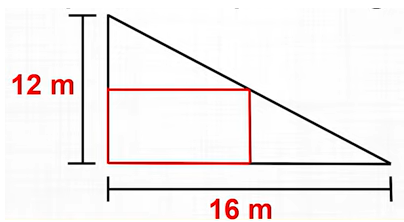


</center>

---
Fonte: [MÉTODO DOS MULTIPLICADORES DE LAGRANGE 📚 AULA 1](https://www.youtube.com/watch?v=iPyMGocdQyU)

---

In [ ]:
import pyomo.environ as pyo



---
---
# BREVE INTRODUÇÃO AO SYMPY
---
---

<p align=justify>
&emsp; O SymPy (<b>Sym</b>bolic <b>Py</b>thon) é uma biblioteca Python para matemática simbólica que visa se tornar um sistema de álgebra computacional (ou <i>Computer Algebric System</i>, ou ainda, CAS) completo, mantendo o código o mais simples possível para ser compreensível e facilmente extensível.<br>
&emsp; Um CAS, por sua vez, pode ser utilizado para cálculos com expressões matemáticas complicadas, resolução de equações, simulações, dentre outras aplicações. Há sistemas gratuitos como o SymPy e o Octave, e comerciais como Maple, MATLAB e Mathematica, cuja decisão de preferir um ou outro depende dos aspectos técnicos e da análise custo vs benefício do seu projeto. Para mais informações sobre a biblioteca, visite <a href='https://www.sympy.org/en/index.html'>o site do projeto</a>.<br>
&emsp; Por se tratar de um CAS, o SymPy, ao contrário de bibliotecas como Math cujos cálculos são aproximações (o que pode levar a erros e acumulos de erros nas contas), representa números e operações simbolicamente, o que permite que o resultado das contas seja obtida de forma <b>EXATA</b> (ou <b>analiticamente</b>, como é formalmente dito).<br>
&emsp; Um breve exemplo disso é como mostrado a seguir, onde queremos calcular $\sqrt{3}$.
</p>

In [ ]:
import math
math.sqrt(3)

<p align=justify>
&emsp; Aí, sabe-se que elevando $\sqrt{3}$ ao quadrado obtemos $3$ de volta, certo?
</p>

In [ ]:
math.sqrt(3)**2

<p align=justify>
&emsp; E aí fica claro a limitação da biblioteca Math, pois o valor obtido por <code>math.sqrt(3)</code> só corresponde a uma aproximação da $\sqrt{3}$ até a 16ª casa decimal, uma vez que o nível de precisão do Python vai até $1 \cdot 10^{-16}$. E o SymPy consegue driblar esse limite, uma vez que ele não lê os números como <code>float</code> ou <code>int</code>, mas sim como símbolos. Tanto que ao calcular a $\sqrt{3}$ ele nos simplesmente retorna a própria $\sqrt{3}$.
</p>

In [ ]:
import sympy as sp
sp.sqrt(3)

<p align=justify>
&emsp; Para pedir ao Sympy calcular a $\sqrt{3}$, com $n$ casas decimais, usa-se o método <code>.evalf(n)</code>. No exemplo a seguir, queremos o valor da $\sqrt{3}$ até a 100ª casa decimal.
</p>

In [ ]:
sp.sqrt(3).evalf(100)

<p align=justify>
&emsp; E se for feito $\sqrt{3}^{2}$ pelo SymPy, obteremos o valor exato $3$ novamente, sem mais nem menos.
</p>

In [ ]:
sp.sqrt(3)**2

<p align=justify>
&emsp; Por causa disso, o Sympy é útil para realização de vários problemas de matemática, englobando resolução de expressões algébricas, cálculo de limite, derivada, integral, equações diferenciais, transformadas de Laplace, cálculo vetorial, matrizes etc.<br>
&emsp; Apenas para dar um gostinho do que o Sympy é capaz de fazer, segue alguns exemplos.
</p>

In [ ]:
import sympy as sp

x = sp.Symbol('x') # Aqui declaramos o símbolo 'x'

# Cálculo de limites
f = 1/x**2
L1 = sp.limit(f, x, 0, "+") # x se aproxima de 0 pela direita.
L1

In [ ]:
f = 1/x
L2 = sp.limit(f, x, 0, "-") # x se aproxima de 0 pela esquerda.
L2

-oo

In [ ]:
f  = sp.sin(x)/x
L3 = sp.limit(f, x, 0) # x se aproxima de 0, não importa para qual lado.
L3

In [ ]:
f  = (1 + 1/x)**x
L4 = sp.limit(f, x, sp.oo) # oo é infinito.
L4

In [ ]:
f  = (2*x**2 + 5*x - 3)/(2*x**2 - 5*x + 2)
L5 = sp.limit(f, x, sp.Rational(1/2))
L5

-7/3

In [ ]:
f  = (sp.sqrt(x+2) + sp.sqrt(x+6) - sp.sqrt(6) - sp.sqrt(2))/x
L6 = sp.limit(f, x, 0)
L6

sqrt(6)/12 + sqrt(2)/4

In [ ]:
from sympy import Symbol, Function, cos, sin, ln, sqrt, diff, Eq, dsolve

x = sp.Symbol('x')
y = sp.Symbol('y')

#Cálculo de derivadas
f = 3*x**2 + sin(3*sqrt(x))
D1 = diff(f, x) # Derivada em relação a x
D1

6*x + 3*cos(3*sqrt(x))/(2*sqrt(x))

In [ ]:
f = cos(x**3) + sin(x-1)**2
D2 = diff(f, x, x) # Derivada em relação a x, duas vezes.
D2

-9*x**4*cos(x**3) - 6*x*sin(x**3) - 2*sin(x - 1)**2 + 2*cos(x - 1)**2

In [ ]:
f = 4*x*y + cos(x*y**2) - ln(x**y)
D3 = diff(f, x, y) # Derivada parcial em relação a x, e depois a y.
D3

-2*x*y**3*cos(x*y**2) - 2*y*sin(x*y**2) + 4 - 1/x

In [ ]:
f  = ln(x**y**3)
D4 = diff(f, y, y, x) # Deriva duas vezes em relação a y, depois uma vez a x.
D4.subs({y:1, x:2})   # Substitui y por 1 e x por 2 na expressão obtida.

3

In [ ]:
f = Function('f')  # Definindo um função
df = diff(f(x), x) # Derivada de f em x
eq_dif = Eq(f(x) + df, 0) # Equação diferencial
dsolve(eq_dif, f(x)) # resolve a equação diferencial

In [ ]:
from sympy import Symbol, Function, integrate, exp, sqrt, oo

f = Function('f')
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')

# Cálculo de integrais

f = exp(x**2)*x
I1 = integrate(f, x) # Integral indefinida.
I1

In [ ]:
f = sqrt(1-x**2)
I2 = integrate(f, (x, -1, 1)) # Integral definida
I2

In [ ]:
f = exp(-x)
I3 = integrate(f, (x, 0, oo)) # Integral imprópria
I3

1

In [ ]:
f = 1/x**2
I4 = integrate(f, (x, -1, 1))
I4

oo

In [ ]:
f = x**2 * y**3
I5 = integrate(f, (y, x**2, x), (x, 0, 1)) # Integral com duas variáveis
I5

1/77

In [ ]:
f = exp(x + y + z)
I6 = integrate(f, (x, 0, 1), (y, 0, 1), (z, 0, 1))
I6

-exp(2) - 1 + 2*E + E*(-2*E + 1 + exp(2))

---
---
# USANDO SYMPY PARA VERIFICAR CONVEXIDADE DE FUNÇÕES
---
---

<p align=justify>
&emsp; Uma coisa interessante de ver em PNL é se uma dada função é estritamente convexa, convexa, côncava, estritamente côncava ou nem côncava nem convexa. E a forma mais geral de verificar a convexidade de uma função é a partir da seguinte regra:<br>
&emsp; Sendo $f(X = (x_1, x_2,..., x_n)):\mathbb{R}^{n} \rightarrow \mathbb{R}$, a sua matriz Hessiana $H[f(X)]$ será dada por:
<br>
<br>
$$
H[f(X)] = D^{2}f(X) = \begin{bmatrix}
  \frac{\partial^{2} f(X)}{\partial x_1^{2}} &
  \frac{\partial^{2} f(X)}{\partial x_1 \partial x_2} &
  \dots &
  \frac{\partial^{2} f(X)}{\partial x_1\partial x_n} \\
  \frac{\partial^{2} f(X)}{\partial x_2\partial x_1} &
  \frac{\partial^{2} f(X)}{\partial x_2^{2}} &
  \dots &
  \frac{\partial^{2} f(X)}{\partial x_1\partial x_n} \\
  \vdots & \vdots & \ddots & \vdots \\
  \frac{\partial^{2} f(X)}{\partial x_n\partial x_1} &
  \frac{\partial^{2} f(X)}{\partial x_n\partial x_2} &
  \dots &
  \frac{\partial^{2} f(X)}{\partial x_n^{2}}
\end{bmatrix} 
$$
<br>
<br>
&emsp; Por sua vez, os menores principais líderes de $H[f(X)]$ serão definidos por:
<br>
<br>
$$
\begin{array}{lcl}
H_1 & = & \begin{bmatrix}
  \frac{\partial^{2} f(X)}{\partial x_1^{2}}
\end{bmatrix} \\
H_2 & = & \begin{bmatrix}
  \frac{\partial^{2} f(X)}{\partial x_1^{2}} &
  \frac{\partial^{2} f(X)}{\partial x_1 \partial x_2} \\
  \frac{\partial^{2} f(X)}{\partial x_2\partial x_1} &
  \frac{\partial^{2} f(X)}{\partial x_2^{2}}
\end{bmatrix} \\
H_3 & = & \begin{bmatrix}
  \frac{\partial^{2} f(X)}{\partial x_1^{2}} &
  \frac{\partial^{2} f(X)}{\partial x_1 \partial x_2} &
  \frac{\partial^{2} f(X)}{\partial x_1 \partial x_3}\\
  \frac{\partial^{2} f(X)}{\partial x_2\partial x_1} &
  \frac{\partial^{2} f(X)}{\partial x_2^{2}} &
  \frac{\partial^{2} f(X)}{\partial x_2\partial x_3} \\
  \frac{\partial^{2} f(X)}{\partial x_3\partial x_1} &
  \frac{\partial^{2} f(X)}{\partial x_3\partial x_2} &
  \frac{\partial^{2} f(X)}{\partial x_3^{2}}
\end{bmatrix} \\
& \vdots & \\
H_{k \le n} & = & \begin{bmatrix}
  \frac{\partial^{2} f(X)}{\partial x_1^{2}} &
  \frac{\partial^{2} f(X)}{\partial x_1 \partial x_2} &
  \dots &
  \frac{\partial^{2} f(X)}{\partial x_1\partial x_k} \\
  \frac{\partial^{2} f(X)}{\partial x_2\partial x_1} &
  \frac{\partial^{2} f(X)}{\partial x_2^{2}} &
  \dots &
  \frac{\partial^{2} f(X)}{\partial x_1\partial x_k} \\
  \vdots & \vdots & \ddots & \vdots \\
  \frac{\partial^{2} f(X)}{\partial x_k\partial x_1} &
  \frac{\partial^{2} f(X)}{\partial x_k\partial x_2} &
  \dots &
  \frac{\partial^{2} f(X)}{\partial x_k^{2}}
\end{bmatrix}
\end{array}
$$
<br>
<br>
&emsp; E as determinantes $|H_1|, |H_2|, \dots, |H_n|$ dos menores principais líderes determinarão se a matriz $H[f(X)]$ é positiva definida, positiva semidefinida, negativa definida, negativa semidefinida ou indefinida segundo os seguintes casos:
<ol align=justify>
<li>$H[f(X)]$ é <b>positiva definida</b> se, e somente se, as determinantes de todos os seus menores principais líderes forem positivas.</li>
<li>$H[f(X)]$ é <b>positiva semidefinida</b> se, e somente se, as determinantes de todos os seus menores principais líderes forem positivas ou nulas.</li>
<li>$H[f(X)]$ é <b>negativa definida</b> se, e somente se, as determinantes de todos os seus menores principais líderes de ordem ímpar forem negativas e as de ordem par forem positivas.</li>
<li>$H[f(X)]$ é <b>negativa semidefinida</b> se, e somente se, as determinantes de todos os seus menores principais líderes de ordem ímpar forem negativas ou nulas e as de ordem par forem positivas ou nulas.</li>
<li>$H[f(X)]$ é <b>indefinida</b> se não cair em nenhum dos casos anteriores.</li>
</ol>
&emsp; Finalmente, dada todas as definições até aqui, a convexidade de $f(X^{*})$, num dado ponto crítico $X^{*}=(x_1^*, x_2^*, \dots, x_n^*)$, será dada conforme os casos a seguir:
<ol align=justify>
<li>$f(X^{*})$ será estritamente convexa se, e somente se, $H[f(X^{*})]$ for positiva definida.</li>
<li>$f(X^{*})$ será convexa se, e somente se, $H[f(X^{*})]$ for positiva semidefinida.</li>
<li>$f(X^{*})$ será estritamente côncava se, e somente se, $H[f(X^{*})]$ for negativa definida.</li>
<li>$f(X^{*})$ será côncava se, e somente se, $H[f(X^{*})]$ for negativa semidefinida.</li>
<li>$f(X^{*})$ não será côncava nem convexa se, e somente se, $H[f(X^{*})]$ for indefinida.</li>
</ol>
&emsp; A tabela a seguir resume todos os casos:
</p>

<center>

|Condição|Matriz $H[f(X^{*})]$|$f(X^{*})$|
|:-------|:-------------------|:---------|
|$|H_1|>0, |H_2|>0, |H_3|>0, \dots$|Positiva definida|Estritamente convexa|
|$|H_1| \ge 0, |H_2| \ge 0, |H_3|\ge 0, \dots$|Positiva semidefinida|Convexa|
|$|H_1|<0, |H_2|>0, |H_3|<0, \dots$|Negativa definida|Estritamente Côncava|
|$|H_1| \le 0, |H_2| \ge 0, |H_3| \le 0, \dots$|Negativa semidefinida|Côncava|
|Nenhuma das condições anteriores é satisfeita|Indefinida|Nem côncava nem convexa|

</center>

<p align=justify>
&emsp; E a partir dos conhecimentos apresentados até aqui, utilizando a biblioteca SymPy, vamos construir uma função em Python que determinará a convexidade de uma expressão <i>f</i> a partir de sua matriz Hessiana e do cálculo da determinante dos seus menores principais líderes, utilizando a função <code>hessian()</code> e o método <code>.det()</code>, respectivamente.
</p>

In [ ]:
def convexidade(funcao, ponto: dict): # NOTA: Essa function só funciona se a determinante tiver APENAS CONSTANTES.

  from sympy import hessian, pprint, Function # Importando a função para calcular a matriz Hessiana
  f = Function('f')
  f = funcao

  vars = [var for var in f.free_symbols] # Lista de variáveis de f.
  H = hessian(f, vars) # Matriz Hessiana
  print("Matriz Hessiana")
  pprint(H)

  Dets = [] # Array que armazenará as determinantes dos menores principais líderes
  for i in range(1, len(vars)+1):
    Dets.append(H[:i,:i].det().subs(ponto))

  estritamente_convexa = [Dets[i] >  0 for i in range(len(Dets))]
  convexa              = [Dets[i] >= 0 for i in range(len(Dets))]
  estritamente_concava = [Dets[i] <  0 if i%2==0 else Dets[i] >  0 for i in range(len(Dets))]
  concava              = [Dets[i] <= 0 if i%2==0 else Dets[i] >= 0 for i in range(len(Dets))]

  if all(estritamente_convexa):
    return f"A função é estritamente convexa em {ponto}."
  elif all(convexa):
    return f"A função é convexa em {ponto}."
  elif all(estritamente_concava):
    return f"A função é estritamente côncava em {ponto}."
  elif all(concava):
    return f"A função é côncava em {ponto}."
  else:
    return f"A função não é convexa nem côncava em {ponto}."

In [ ]:
from sympy import symbols

x, y, z, w = symbols('x, y, z, w')
expressao = x**2 + 4*y**3 + x*y + 4*x*z + y*z/10 + 3*z**2 + w*2 + 19*w*z + 2*w*y
ponto_critico = {'x': 0, 'y': 0, 'z': 1, 'w': 1}

convexidade(f, ponto_critico)

Matriz Hessiana
⎡0    19    2    0⎤
⎢                 ⎥
⎢19   6    1/10  4⎥
⎢                 ⎥
⎢2   1/10   8    1⎥
⎢                 ⎥
⎣0    4     1    2⎦


"A função não é convexa nem côncava em {'x': 0, 'y': 0, 'z': 1, 'w': 1}."

---
---
# USANDO SYMPY PARA RESOLVER CONDIÇÕES DE KKT
---
---

<p align=justify>
&emsp; As condições de KKT representam o método mais abrangente de resolver problemas de PNL por poderem lidar com restrições de igualdade e de desigualdade, cuja formulação é dada a seguir:
<br>
&emsp; Seja $f(x = (x_1, x_2,\dots, x_n)):\mathbb{R}^{n} \to \mathbb{R}$ uma função escalar de classe $C^1$ cujo problema de otimização é dado por:
<br>
<br>
$$
\text{Max } z=f(x)
$$
<br>
$$
\begin{equation}
  \begin{array}{ll}
    \text{Sujeito a: } & \\
    & H = \left\{\begin{array}{l}
          h_1(x)=0 \\
          h_2(x)=0 \\
          \vdots \\
          h_m(x)=0
          \end{array}\right. \\
    & G = \left\{\begin{array}{l}
          g_1(x) \le 0 \\
          g_2(x) \le 0 \\
          \vdots \\
          g_k(x) \le 0
          \end{array}\right.
  \end{array}
\end{equation}
$$
<br>
<br>
&emsp; Onde os conjuntos $H$ e $G$ são restrições de igualdade e desigualdade, respectivamente, definidas por funções escalares $h, g: \mathbb{R}^n \to \mathbb{R}$, taambém de classe $C^1$, que cumprem as codições de regularidade em todos os pontos, isto é, a jacobiana do conjunto de restrições ativas $R=H \cup G$ é linearmente indenpendente. Em termos mais formais, o posto de $J_R(x)$ é igual a $m+k$.
<br>
<br>
$$
J_R(x)=\begin{bmatrix}
  \nabla h_1(x) \\
  \nabla h_2(x) \\
  \vdots \\
  \nabla h_m(x) \\
  \nabla g_1(x) \\
  \nabla g_2(x) \\
  \vdots \\
  \nabla g_k(x) \\
\end{bmatrix}
=\begin{bmatrix}
  \frac{\partial h_1(x)}{\partial x_1} &
  \frac{\partial h_1(x)}{\partial x_2} &
  \dots &
  \frac{\partial h_1(x)}{\partial x_n} \\
  \frac{\partial h_2(x)}{\partial x_1} &
  \frac{\partial h_2(x)}{\partial x_2} &
  \dots &
  \frac{\partial h_2(x)}{\partial x_n} \\
  \vdots & \vdots & \ddots & \vdots \\
  \frac{\partial h_m(x)}{\partial x_1} &
  \frac{\partial h_m(x)}{\partial x_2} &
  \dots &
  \frac{\partial h_m(x)}{\partial x_n} \\
  \frac{\partial g_1(x)}{\partial x_1} &
  \frac{\partial g_1(x)}{\partial x_2} &
  \dots &
  \frac{\partial g_1(x)}{\partial x_n} \\
  \frac{\partial g_2(x)}{\partial x_1} &
  \frac{\partial g_2(x)}{\partial x_2} &
  \dots &
  \frac{\partial g_2(x)}{\partial x_n} \\
  \vdots & \vdots & \ddots & \vdots \\
  \frac{\partial g_k(x)}{\partial x_1} &
  \frac{\partial g_k(x)}{\partial x_2} &
  \dots &
  \frac{\partial g_k(x)}{\partial x_n}
\end{bmatrix}
\ne \overrightarrow{0}, \forall  X \in R
$$
<br>
<br>
&emsp; Então existem constantes $\lambda_1, \lambda_2, \dots, \lambda_m$ e $\mu_1, \mu_2, \dots, \mu_k$, chamados de multiplicadores de KKT, que satisfazem um conjunto de restrições que permitem encontrar os pontos críticos do Lagrangeano $L(x_1, \dots, x_n, \lambda_1, \dots, \lambda_m, \mu_1, \dots, \mu_k): \mathbb{R}^{n+m_+k} \to \mathbb{R}$, que são os candidatos a maximizarem $f(x)$.
<br>
&emsp; Tal Lagrangeano é dado por:
<br>
$$
L = f(x) - \sum_{i=1}^{m} \lambda_{i} h_{i}(x)-\sum_{j=1}^{k} \mu_{j} g_{j}(x)
$$
<br>
&emsp; Cujo conjunto de restrições, conhecido por <b>condições de KKT</b>, as quais permitem encontrar os pontos candidatos a maximizarem f(x), é dado por.
<br>
<br>
$$
\left\{\begin{array}{lll}
  \nabla f(x) = \sum_{i=1}^{m} \lambda_{i} \nabla h_i(x) + \sum_{j=1}^{k} \mu_{j} \nabla g_j(x) & & (1) \\
  h_i(x) = 0, & \forall i=1,\dots,m & (2) \\
  g_j(x) \le 0, & \forall j=1, \dots, k & (3) \\
  \mu_j \cdot g_j(x)=0, & \forall j=1,\dots,k & (4) \\
  \mu_j \ge 0, & \forall j=1, \dots, k & (5)
  \end{array}\right.
$$
<br>
&emsp; Note-se que as restrições $(1)$ e $(2)$ são obtidas ao se calcular $\frac{\partial L(x, \lambda, \mu)}{\partial x}$ e $\frac{\partial L(x, \lambda, \mu)}{\partial \lambda}$, respectivamente. E que caso $k=0$, isto é, não houvesse restrições de desigualdade, as condições KKT se transformam nas condições de Lagrange e os multiplicadores KKT são chamados multiplicadores de Lagrange.
<br>
&emsp; No intuito de resolver os problemas de otimização não linear, foi implementado a função <code><font color='#DCDCAA'>KKT</font>()</code>, utilizando a biblioteca SymPy já apresentada, em que são passadas como argumentos para essa função <i>strings</i> para a função $f(x)$ a ser otimizada e as restrições de igualdade e desigualdade já no formato $h(x)=0$ e $g(x) \le 0$, ambas passadas como duas listas de <i>strings</i>. Caso se busque minimizar ao invés de maximizar a função, o parâmetro booleano <code>max</code> deve ser definida como <code><font color='#569CD6'>False</font></code>. Ao final, a função <code><font color='#DCDCAA'>KKT</font>()</code> retorna uma lista cujo primeiro item corresponde ao valor ótimo encontrado para $f(x)$ e os itens restantes são os pontos $p$ encontrados que maximizam $f(x)$.
<br>
&emsp; Além disso, foi criado a função <code><font color='#DCDCAA'>print_solucao_KKT</font>()</code> para dar uma melhor visualização da solução encontrada pela função <code><font color='#DCDCAA'>KKT</font>()</code> quando imprimá-la na tela.
</p>

In [ ]:
def KKT(f: str, h: list = [], g: list = [], max=True) -> list:

  # NOTA: As expressões contidas em h e g devem ser tais que h=0 e g<=0

  import sympy as sp # Importando a biblioteca SymPy
  m = len(h) # Quantidade de restrições de igualdade
  k = len(g) # Quantidade de restrições de desigualdade

  if max == True:
    f = sp.parse_expr(f) # Construindo a função f pela string passada como parâmetro
  else:
    f = sp.parse_expr(f'-({f})')
  
  vars = f.free_symbols # Obtendo o conjunto de variáveis
  pars = list(vars) # Lista de parâmetros

  if m > 0:
    for i in range(m):
      exec(f'h{i+1} = sp.Symbol("h_{i+1}")')
      exec(f'h{i+1} = sp.parse_expr(h[{i}])') # Cria a restrição de igualdade h_i
      exec(f'l{i+1} = sp.Symbol("\\lambda_{i+1}")') # Cria o parâmetro lambda_i
      exec(f'pars.append(l{i+1})') # Adiciona lambda_i à lista de parâmetros

  if k > 0:
    for j in range(k):
      exec(f'g{j+1} = sp.Symbol("g_{j+1}")')
      exec(f'g{j+1} = sp.parse_expr(g[{j}])') # Cria a restrição de desigualdade g_i
      exec(f'u{j+1} = sp.Symbol("\\mu_{j+1}", negative=False)') # Cria o parâmetro mu_i
      exec(f'p{j+1} = sp.Symbol("p_{j+1}", negative=False)') # Cria a folga p_i
      exec(f'pars.append(u{j+1})') # Adiciona mu_i à lista de parâmetros
      exec(f'pars.append(p{j+1})') # Adiciona p_i à lista de parâmetros

  # Criando o Lagrangeano
  L = sp.Symbol('L')
  L = f

  if m > 0:
    for i in range(m):
      locais_dict = dict() # Dicionário de variáveis locais a ser passado para exec()
      exec(f'L = L - l{i+1}*h{i+1}',
           {'L': L,
            f'l{i+1}': sp.Symbol(f'\\lambda_{i+1}'),
            f'h{i+1}': sp.parse_expr(h[i])
           },
           locais_dict
          )
      L = locais_dict['L'] # Adicionando a parcela lambda_j * h_j ao Lagrangeano

  if k > 0:
    for j in range(k):
      locais_dict = dict() # Dicionário de variáveis locais a ser passado para exec()
      exec(f'L = L - u{j+1}*g{j+1}',
           {'L': L,
            f'u{j+1}': sp.Symbol(f'\\mu_{j+1}', negative=False),
            f'g{j+1}': sp.parse_expr(g[j])
           },
           locais_dict
          )
      L = locais_dict['L'] # Adicionando a parcela mu_i * g_i ao Lagrangeano

  # Criando as condições de KKT a partir do Lagrangeano
  R = [] # Conjunto de restrições

  for var in vars:
    R.append(sp.diff(L, var)) # Adiciona a derivada do Lagrangeano em relação à variável 'var'

  if m > 0:
    for i in range(m):
      exec(f'R.append(h{i+1})')
  
  if k > 0:
    for j in range(k):
      exec(f'R.append(u{j+1} * g{j+1})')
      exec(f'R.append(g{j+1} + p{j+1})')

  # Resolvendo as condições de KKT
  crit_lagr = sp.solve(R, pars, dict=True) # Pontos críticos do Lagrangeano
  pontos_f = [{var: ponto.get(var) for var in ponto if var in vars} for ponto in crit_lagr] # pontos no domínio de f

  # Buscando o(s) ponto(s) que maximiza(m) f

  maximo = -float('inf') # infinito negativo
  solucao = list()

  for ponto in pontos_f:
    if f.subs(ponto) > maximo:
      maximo = f.subs(ponto)
  
  if max:
    solucao.append({'valor ótimo': maximo})
  else:
    solucao.append({'valor ótimo': -maximo})
  
  for ponto in pontos_f:
    if f.subs(ponto) == maximo:
      solucao.append(ponto)

  return solucao



def print_solucao_KKT(solucao: list, vars: list):

  from IPython.display import display, Latex
  from sympy import latex, Symbol

  valor_otimo = latex(solucao[0]['valor ótimo'])

  display(Latex('\\text{Valor ótimo: } f(p^*)=' + valor_otimo))
  print('- '*50)
  display(Latex('\\text{Ponto(s)}'))

  for i in range(1, len(solucao)):

    ponto = f"$p_{i}({vars[0]}"
    for j in range(1, len(vars)):
      ponto += f",{vars[j]}"

    ponto += f")=({latex(solucao[i][Symbol(vars[0])])}"
    for j in range(1, len(vars)):     
      ponto += f",{latex(solucao[i][Symbol(vars[j])])}"
    ponto += ")$"

    display(Latex(ponto))

<p align=justify>
&emsp; Com a função <code><font color='#DCDCAA'>KKT</font>()</code> implementada, vamos resolver alguns exemplos de PNL para demonstrar a sua aplicação.
<br>
<br>
<hr/>
&emsp; $\text{Exemplo 1}$
<hr/>
<br>
$$
\text{Max } f(x_1,x_2)=24x_1 - x_1^2 + 10x_2 - 2x_2^2
$$
<br>
$$
\begin{array}{ll}
  \text{Sujeito a: } & \\
    & x_1 \le 8 \\
    & x_2 \le 7 \\
    & x_1 \ge 0 \\
    & x_2 \ge 0
\end{array}
$$
</p>

In [ ]:
solucao1 = KKT('24*x_1 - x_1**2 + 10*x_2 - 2*x_2**2',
              g=['x_1 - 8',
                 'x_2 - 7',
                 '-x_1',
                 '-x_2'
                ]
              )

print_solucao_KKT(solucao1, ['x_1', 'x_2'])

<IPython.core.display.Latex object>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<p align=justify>
<hr/>
&emsp; $\text{Exemplo 2}$
<hr/>
<br>
$$
\text{Max } f(x_1,x_2)=x_1^2x_2
$$
<br>
$$
\begin{array}{ll}
  \text{Sujeito a: } & \\
    & 2x_1^2 + x_2^2 = 3
\end{array}
$$
</p>

In [ ]:
solucao2 = KKT('x_1**2 * x_2',
               h=['2*x_1**2 + x_2**2 - 3']
              )

print_solucao_KKT(solucao2, ['x_1', 'x_2'])

<IPython.core.display.Latex object>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<p align=justify>
<hr/>
&emsp; $\text{Exemplo 3}$
<hr/>
<br>
$$
\text{Max } f(x_1,x_2)=2x_1 + 3x_2 - x_1^2 - x_2^2
$$
<br>
$$
\begin{array}{ll}
  \text{Sujeito a: } & \\
    & x_1 + x_2 \le 2 \\
    & x_1 \ge 0 \\
    & x_2 \ge 0
\end{array}
$$
</p>

In [ ]:
solucao3 = KKT('2*x_1 + 3*x_2 - x_1**2 - x_2**2',
               g=['x_1 + x_2 - 2',
                  '-x_1',
                  '-x_2'
                 ]
               )

print_solucao_KKT(solucao3, ['x_1', 'x_2'])

<IPython.core.display.Latex object>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<p align=justify>
<hr/>
&emsp; $\text{Exemplo 4}$
<hr/>
<br>
$$
\text{Max } f(x,y)=x^2+y^2
$$
<br>
$$
\begin{array}{ll}
  \text{Sujeito a: } & \\
    & xy = 1
\end{array}
$$
</p>

In [ ]:
solucao4 = KKT('x**2 + y**2',
               h=['x*y - 1']
              )

print_solucao_KKT(solucao4, ['x', 'y'])

<IPython.core.display.Latex object>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<p align=justify>
<hr/>
&emsp; $\text{Exemplo 5}$
<hr/>
<br>
$$
\text{Max } f(x,y)=3x+4y
$$
<br>
$$
\begin{array}{ll}
  \text{Sujeito a: } & \\
    & x^2 + y^2 \le 4 \\
    & x \ge 1
\end{array}
$$
</p>

In [ ]:
solucao5 = KKT('3*x + 4*y',
               g=['x**2 + y**2 - 4', '1 - x']
              )

print_solucao_KKT(solucao5, ['x', 'y'])

<IPython.core.display.Latex object>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<p align=justify>
<hr/>
&emsp; $\text{Exemplo 6}$
<hr/>
<br>
$$
\text{Max } f(x,y,z)=xyz
$$
<br>
$$
\begin{array}{ll}
  \text{Sujeito a: } & \\
    & x^2 + y^2 = 1 \\
    & x + z = 1
\end{array}
$$
</p>

In [ ]:
solucao6 = KKT('x*y*z',
               h=['x**2 + y**2 - 1', 'x + z - 1']
              )

print_solucao_KKT(solucao6, ['x', 'y', 'z'])

<IPython.core.display.Latex object>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<p align=justify>
<hr/>
&emsp; $\text{Exemplo 7}$
<hr/>
<br>
$$
\text{Max } f(x,y,z)=8xyz
$$
<br>
$$
\begin{array}{ll}
  \text{Sujeito a: } & \\
    & \frac{x^2}{9} + \frac{y^2}{4} + z^2 = 1
\end{array}
$$
</p>

In [ ]:
solucao7 = KKT('8*x*y*z',
               h=['x**2/9 + y**2/4 + z**2 - 1']
              )

print_solucao_KKT(solucao7, ['x', 'y', 'z'])

<IPython.core.display.Latex object>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>